## Bike Sharing

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Import Libraries whenever needed

In [548]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import numpy and pandas to read the dataset
import numpy as np
import pandas as pd

#Import libraries for plots
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#Import sklearn libraries for splitting dataset, Linear Regression & scaling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

#Import statsmodel libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor # For VIF
#

## Define Procedure/Function whenever needed

In [549]:
# function to create distribution and box plots
def univariate(df,col):
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(10,3))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[1])
        plt.show()
        
# function to calculate VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

## Step 1: Reading, understanding & cleaning the Data

In [550]:
#<1> Import day.csv file
bike = pd.read_csv("day.csv")

In [551]:
#<2> Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [552]:
#<3> Checking shape of dataset ( Rows= 730 & Features=16)
bike.shape

(730, 16)

In [553]:
#<4> To check the datatype of each column in dataset.
bike.info()

# Observation:-
#    1. There is no missing values so no imputation is required.
#    2. Except dteday (Date Type), all are either. interger or float type.      
#    3. Numerical Variable:-> yr, mnth, holiday, weekday, workingday
#    4. Float Variable:->  temp, atemp, hum, windspeed
#    5. Numerical Varaiable may need to convert into Categorical Variable: season,mnth,weathersit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [554]:
#<5> To find the statistics of datset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [555]:
#<6> To find the Unique values of Categorical field
print ("Season    : ", bike['season'].unique())
print ("Weathersit: ", bike['weathersit'].unique())
print ("yr        : ", bike['yr'].unique())
print ("mnth      : " ,bike['mnth'].unique())
print ("holiday   : ", bike['holiday'].unique())
print ("weekday   : ", bike['weekday'].unique())
print ("workingday: ", bike['workingday'].unique())

# Observation:- Possible values for below descrete numercical values.
#    1.'season'     -> 1,2,3,4
#    2.'weathersit' -> 1,2,3
#    3.'yr'         -> 0,1
#    4.'mnth'       -> 1,2,3,4,......,12
#    5.'holiday'    -> 0,1
#    6.'weekday'    -> 0,1,2,3,4,5,6
#    7.'workingday' -> 0,1
#    8. temp, hum, windspeed can take any values either numerical or float

Season    :  [1 2 3 4]
Weathersit:  [2 1 3]
yr        :  [0 1]
mnth      :  [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday   :  [0 1]
weekday   :  [6 0 1 2 3 4 5]
workingday:  [0 1]


In [556]:
#<7> Check the percentage of null/missing values for each given column in the given dataset

round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

# Observation:
#    1. No missing values

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [557]:
#<8> Check the percentage of null/missing values for each given row in the given dataset
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

# Observation:
#    1. No missing values

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [558]:
#<9> Duplicate Check- Checking for duplicates and dropping the entire duplicate row if any
bike_dup = bike.copy()
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

# Observation:
#    1. No Duplicate rows.

(730, 16)

In [559]:
#checking columns again
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [560]:
#<10> Dropping redundant & unrequired columns

# Observaton: By observing at first glance about dasaset and data dictinary, decided to remove below columns:
#    (a) instant: Its only an index value
#    (b) dteday : This has the date, Since we already have seperate columns for 'year' & 'month' so not required.
#    (c) casual & registered : cnt has already this info so not required.
#Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. 
#More over, we have created a new variable to have the ratio of these customer types.
#We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

# dropping columns: instant','dteday','casual','registered
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


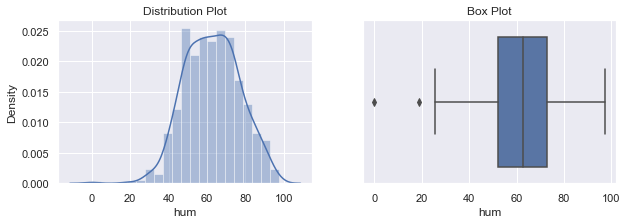

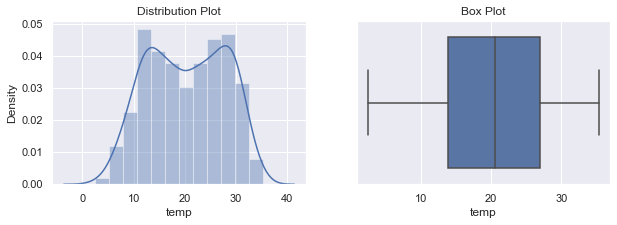

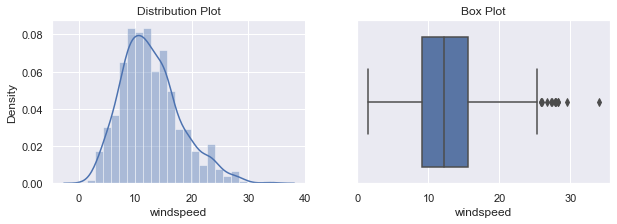

In [561]:
#<11> Checking outliers in num/float columns (hum, temp, & windspeed) and treat outliers if needed. 
univariate(df=bike,col='hum')
univariate(df=bike,col='temp')
univariate(df=bike,col='windspeed')

# Observation:
#    1. No major outliear so no need to treat outliers here.

In [562]:
#<12> Convert season, weathersit, yr, mnth, holiday, weekday & workingday into 'category' data type.
bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['yr']=bike['yr'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['holiday']=bike['holiday'].astype('category')
bike['weekday']=bike['weekday'].astype('category')
bike['workingday']=bike['workingday'].astype('category')
bike.info()
#    1.'season'     -> 1,2,3,4
#    2.'weathersit' -> 1,2,3
#    3.'yr'         -> 0,1
#    4.'mnth'       -> 1,2,3,4,......,12
#    5.'holiday'    -> 0,1
#    6.'weekday'    -> 0,1,2,3,4,5,6
#    7.'workingday' -> 0,1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [563]:
#checking columns again
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [564]:
#<13> Creating labels for categorical variable:
bike['season']=bike['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
bike['weathersit']=bike['weathersit'].map({1:'Clear',2:'Cloudy',3:'Snow',4:'Rain'})
bike['mnth']=bike['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weekday'] = bike['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike['yr'] = bike['yr'].map({0:'2018',1:'2019'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualization of Data through  Exploratory Data Analysis 

## 2(a): Visualising Numerical variables through pairplot & corr()

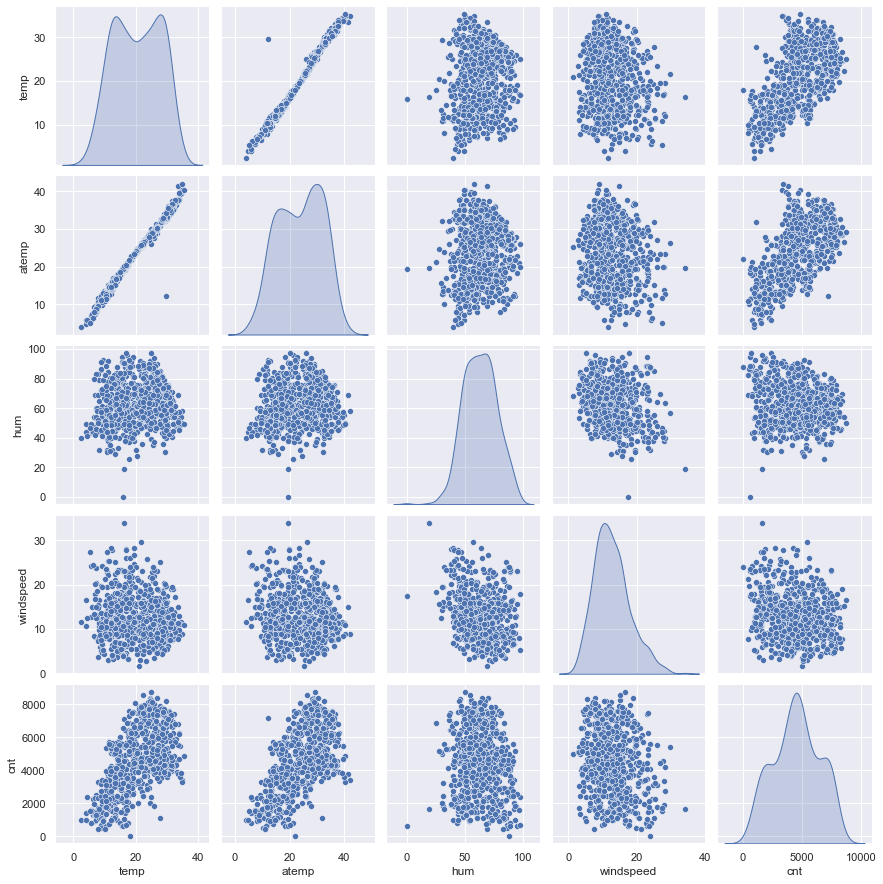

In [565]:
# Since temp, hum, windspeed are continuous variable so draw Pairplot for these over "cnt"
sns.pairplot(bike[['temp','atemp','hum','windspeed','cnt']],diag_kind='kde')
plt.show()

# Observation:
#    1. temp and atemp has highest correlation with the target variable 'cnt'. 
#    2. temp and atemp are highly correlated with each other.

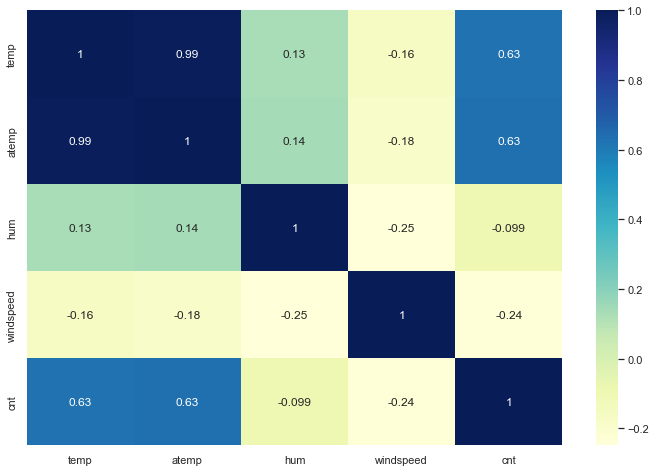

In [566]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (12, 8))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Observation:
#    1. temp and atemp are highly correlated to cnt.
#    1. temp and atemp are highly correlated with each other. Sign of multicollinearity.
#    3. temp and atemp both cannot be used in model because it will lead to multicollinearity.
#    4. Using VIF and p-value, we will decide to which one we need to consider for model building.

## 2(b): Visualising Categorical variables through pairplot

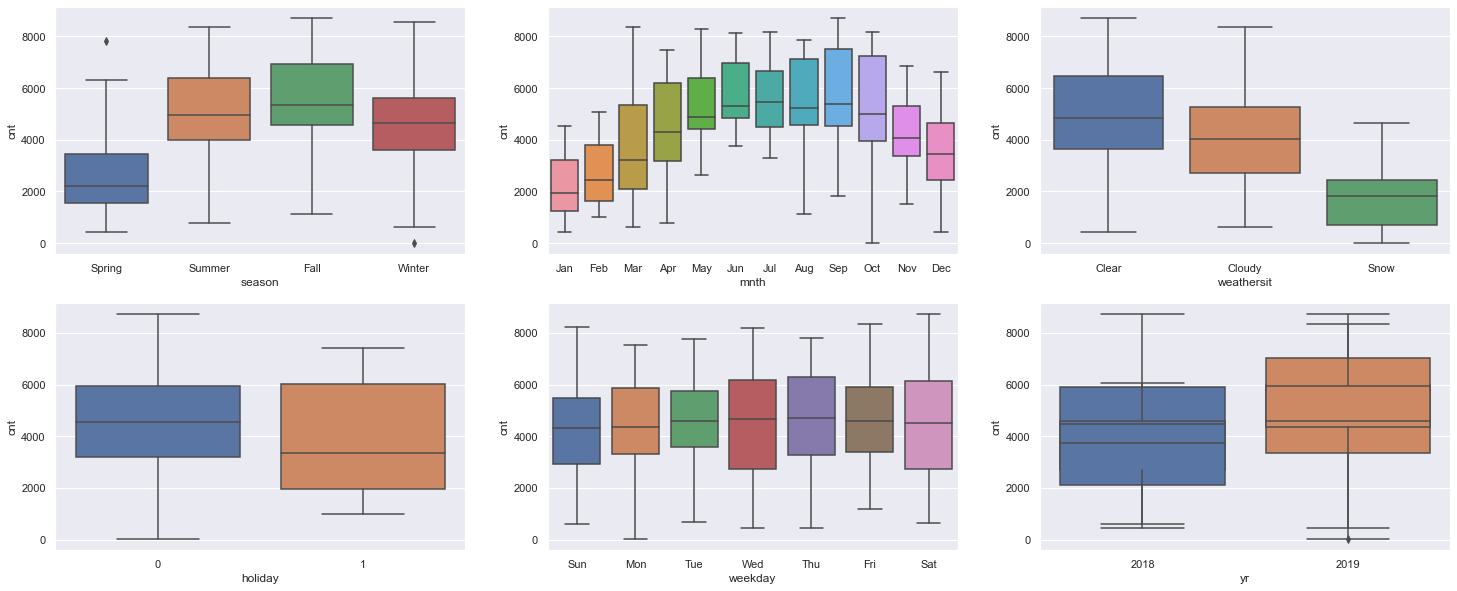

In [567]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

# Observation:
#    1. Season: Fall has highest demand for rental bikes and Spring has least. Season is good predictor for cnt.
#    2. mnth: A clear trend of increasing bike booking from may to Sept. mnth is good predictor for cnt.
#    3. weathersit: In a clear weather booking is high & in snow it's least. weathersit is also good predictor for cnt.
#    4. holiday: On non holiday total bookings is higher Hence holiday is good variable for making prediction.
#    5. weekday: Weekday is not showing any trend. NOT GOOD PREDICTOR FOR cnt.
#       I will let the model decide if this needs to be added or not.
#    6. Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking.
#       This indicates, workingday can be a good predictor for the dependent variable
#    7. yr is also good predictor but we have only 2 years to compare so lets model to decide.
###########################################################################################################################

## Step 3: Data Preparation
- 1.Encoding:
       a. Converting binary variables into 1/0.
       b. Others categorical variables into Dummy variables
- 2. Splittin into Train and Test sets
- 3. Rescaling

In [568]:
#<1> Create dummy variable for selected categorical variables 
bike = pd.get_dummies(data=bike,columns=['season','mnth','yr','weekday','weathersit'], drop_first=True)
bike.head()

# bike[varlist] = bike[varlist].apply(labmda x/; x.map({'yes':1,"no":0})) Alternate option by using labda function

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,...,mnth_Dec,yr_2019,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Cloudy,weathersit_Snow
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [569]:
#<2> Splitting the dataframe into train and test sets
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

# Alternate method- 
# X=bike,y=bike['cnt']
# X_train, y_train, X_test, y_test = train_test_split(X,y,test_size=0.3, random_state=11)

In [570]:
print(bike.shape)
print(df_train.shape)
print(df_test.shape)

(730, 30)
(510, 30)
(219, 30)


In [571]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,...,mnth_Dec,yr_2019,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Cloudy,weathersit_Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,20.102429,23.493909,63.112926,12.831318,4486.382353,0.245098,0.262745,0.24902,0.066667,0.098039,...,0.084314,0.507843,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,7.431169,8.090038,14.156632,5.291832,1952.158739,0.430568,0.440557,0.43287,0.249689,0.297660,...,0.278131,0.500429,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [572]:
#<3> Apply rescaling the features which are Numeric/Float Variables. Coefficient are important for interpreation and
# for faster convergence. Applying MinMax which is [(x-xmin)/(xmax-xmin)] value lies between 0 & 1.
# MinMax also taken care of Outliers.

# Create a list of numeric/float variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

# Instantiate an object
scaler = MinMaxScaler()  

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) 

#Note:- 
#fit() - Learns Xmin, Xmax
#transform() - X-Xmin/Xmax-Xmin
#fit_transform() - 

In [573]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,...,mnth_Dec,yr_2019,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Cloudy,weathersit_Snow
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,1,0,1,0,0,0,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,1,0,1,0,0,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,1,0,0,0,0,0,1,1,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,...,1,1,0,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,1,0,0,0,0,0,1,1,0


In [574]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,...,mnth_Dec,yr_2019,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Cloudy,weathersit_Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.066667,0.098039,...,0.084314,0.507843,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.249689,0.297660,...,0.278131,0.500429,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Build model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

Perform RFE to remove features and then follow manual removal using statsmodel Recursive feature elimination.

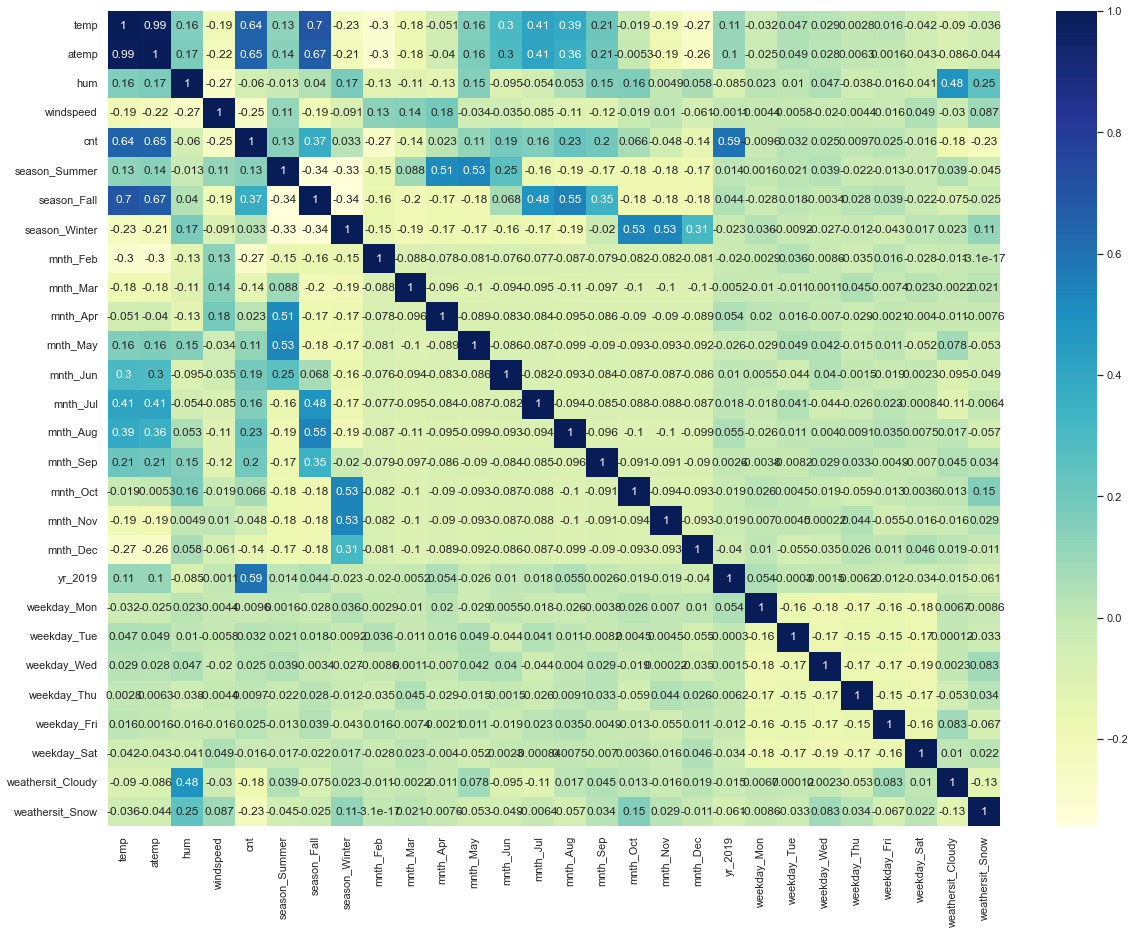

In [575]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()
# Observation:
#    1. temp and atemp are correlated. let's drop atemp.
#    2. temp is highly correlated with cnt.
#    3. There is corelation between month and seasons like May is to Summer and Spring is to Feb and Jan.

In [576]:
# Create X_train & y_train
#X_train = df_train
#y_train = df_train.pop('cnt')
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### 4(a). Building Model - Use RFE (Recursive Feature Elimination)

In [577]:
# RFE - Recursive feature elimination 
# Let's run RFE with all the variable present in X_train and y_trainthe output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [578]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Summer', True, 1),
 ('season_Fall', False, 6),
 ('season_Winter', True, 1),
 ('mnth_Feb', False, 12),
 ('mnth_Mar', False, 7),
 ('mnth_Apr', False, 10),
 ('mnth_May', False, 8),
 ('mnth_Jun', False, 11),
 ('mnth_Jul', False, 13),
 ('mnth_Aug', False, 2),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Nov', False, 14),
 ('mnth_Dec', False, 15),
 ('yr_2019', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', True, 1),
 ('weekday_Thu', True, 1),
 ('weekday_Fri', True, 1),
 ('weekday_Sat', False, 4),
 ('weathersit_Cloudy', False, 3),
 ('weathersit_Snow', True, 1)]

In [579]:
# Selected columns via RFE in col list
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_Sep', 'yr_2019', 'weekday_Mon', 'weekday_Tue',
       'weekday_Wed', 'weekday_Thu', 'weekday_Fri', 'weathersit_Snow'],
      dtype='object')

In [580]:
# Rejected columns via RFE in col list
X_train.columns[~rfe.support_]

Index(['atemp', 'season_Fall', 'mnth_Feb', 'mnth_Mar', 'mnth_Apr', 'mnth_May',
       'mnth_Jun', 'mnth_Jul', 'mnth_Aug', 'mnth_Oct', 'mnth_Nov', 'mnth_Dec',
       'weekday_Sat', 'weathersit_Cloudy'],
      dtype='object')

In [581]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe_1 = X_train[col]

In [582]:
# Calculate VIF
calculateVIF(X_train_rfe_1)

,Features,VIF
0,holiday,inf
1,workingday,inf
9,weekday_Mon,inf
10,weekday_Tue,inf
11,weekday_Wed,inf
12,weekday_Thu,inf
13,weekday_Fri,inf
3,hum,10.94
2,temp,7.20
4,windspeed,3.58


In [583]:
# VIF is infinity for holiday,workingday,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Mon. Lets drop.
X_train_rfe_1 = X_train_rfe_1.drop(['holiday','workingday','weekday_Mon','weekday_Tue','weekday_Wed','weekday_Thu','weekday_Fri',
                                'weekday_Mon'], axis = 1)

# Calculate VIF
calculateVIF(X_train_rfe_1)

,Features,VIF
1,hum,9.99
0,temp,7.09
2,windspeed,3.52
6,yr_2019,2.01
4,season_Winter,1.64
3,season_Summer,1.58
5,mnth_Sep,1.20
7,weathersit_Snow,1.08


### 4(b). Build model using statsmodel - 1st Model

In [584]:
X_train_lm_1 = sm.add_constant(X_train_rfe_1)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

# Observation:
#    1. Coeff is positive
#    2. Significance- p-value is zero
#    3. R2/Adjusted R2 is around 0.826/0.823

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     296.9
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          1.12e-184
Time:                        22:03:46   Log-Likelihood:                 484.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     501   BIC:                            -912.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2636      0.026     

## There is no p-value greater than 0.05 so we need to take a look into VIF to decide.

In [585]:
# # VIF for hum is 9.9 so let's drop it and look into vif again.
X_train_rfe_2 = X_train_rfe_1.drop(['hum'], axis = 1)

# Calculate VIF
calculateVIF(X_train_rfe_2)

# Observation: Now we can see that vif value is less than 5 for all features.

,Features,VIF
0,temp,3.63
1,windspeed,2.95
5,yr_2019,2.00
2,season_Summer,1.54
3,season_Winter,1.34
4,mnth_Sep,1.19
6,weathersit_Snow,1.06


### 4(c). Build model using statsmodel - 2nd Model 

In [586]:
X_train_lm_2 = sm.add_constant(X_train_rfe_2)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())
print(calulateVIF(X_train_rfe_2))

# Observation:
#    1. Coeff is positive
#    2. Significance- p-value is zero
#    3. R2/Adjusted R2 is around 0.826/0.823

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     286.4
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          8.49e-171
Time:                        22:03:48   Log-Likelihood:                 448.62
No. Observations:                 510   AIC:                            -881.2
Df Residuals:                     502   BIC:                            -847.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0835      0.018     

####  Note: VIFs and p-values both are within an acceptable range. Hence this is our final model for prediction

### Model is prepared as p-value is < 0.05 and VIF are not > 5 

## Step 5: Validate the Assumptions:
### 1. Error terms should be normally distributed with mean=0.
### 2. No multicollinearity among predictors.
### 3. Homoscedasticity Check.
######################################################################################################

### 5(a).Assumption-1: Error terms should be normally distributed with mean=0.
#### Observation- From below plot we can say that Error terms are normally distributed

In [587]:
# Residual Analysis of the train data
y_train_pred = lr_2.predict(X_train_lm_2)

Text(0.5, 0, 'Errors')

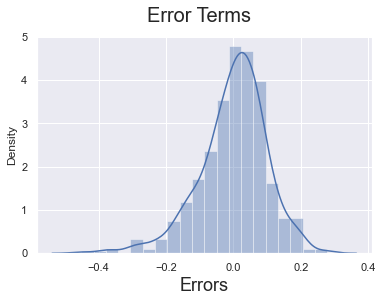

In [588]:
# Calculate the residual
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### 5(b). Assumption-2: Multicollinearity Check
#### Observation- From below we can say that there are no multicollinearity

          Features   VIF
0             temp  3.63
1        windspeed  2.95
5          yr_2019  2.00
2    season_Summer  1.54
3    season_Winter  1.34
4         mnth_Sep  1.19
6  weathersit_Snow  1.06


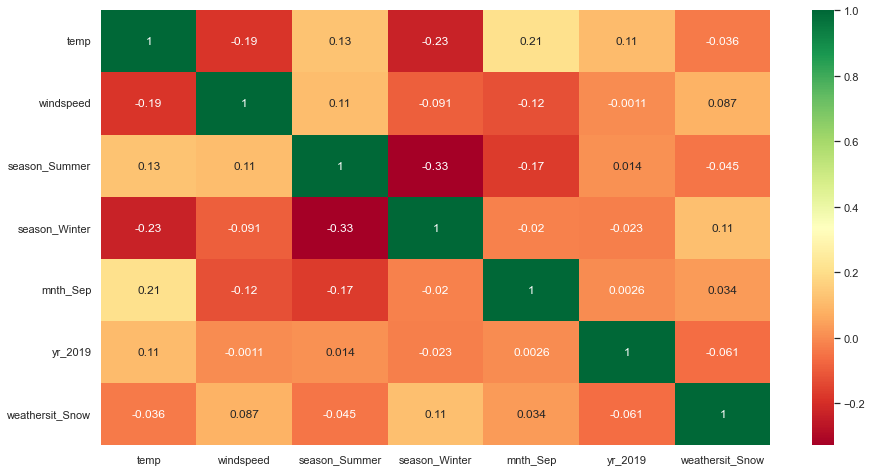

In [589]:
# Multicollinearity Check
print(calulateVIF(X_train_rfe_2))
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe_2.corr(),annot = True, cmap="RdYlGn")
plt.show()

### 5(c). Assumption-3: Homoscedasticity Check
#### Observation- From below we can observe that there is no visible pattern formed

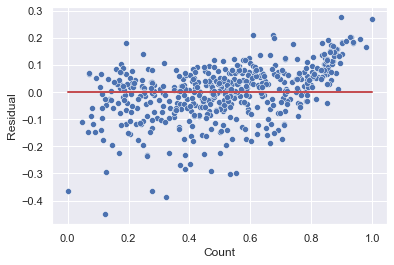

In [590]:
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Step 6: Hypothesis Testing
### Hypothesis Testing states that 
### H0:B1=B2=...=Bn=0 
### H1: at least one Bi!=0
#### Observation:> We can see that all coefficient are not ZERO We fail to REJECT the NULL Hypothesis.

## Step 7: Making Predictions using the Final model

In [591]:
# Applying scaling on the test dataset
df_test[num_vars] = scaler.fit_transform(df_test[num_vars]) 
df_test[num_vars].head()

,temp,atemp,hum,windspeed,cnt
184,0.837241,0.778767,0.534223,0.149393,0.704300
535,0.911423,0.855132,0.470417,0.231142,0.725421
299,0.496221,0.492359,0.777843,0.443398,0.278853
221,0.890387,0.805661,0.236659,0.449707,0.545512
152,0.821739,0.749249,0.070765,0.682387,0.569148


In [592]:
# Create X_test & y_test
X_test = df_test
y_test = df_test.pop('cnt')
y_test.head()


184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64

In [593]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test = X_test[X_train_rfe_2.columns]

# Adding a constant variable 
X_test_lm_2 = sm.add_constant(X_test)

In [600]:
# Making predictions
y_test_pred = lr_2.predict(X_test_lm_2)

## Step 8: Model Evaluation

### 8(a). Plot y_test Vs y_pred

Text(0, 0.5, 'y_pred')

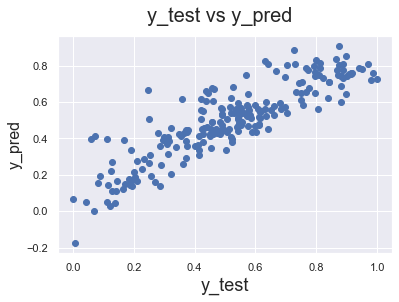

In [601]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 


### Observation: y_test vs y_pred plot is quite linear

### 8(b). R^2 Value for test

In [602]:
from sklearn.metrics import r2_score
print('Train R-Score:' ,r2_score(y_train,y_train_pred))  # R score for train data
print('Test R-Score: ' ,r2_score(y_test, y_test_pred))

Train R-Score: 0.7997672657895226
Test R-Score:  0.7599747773546334


### 8(c). Adjusted R^2 Value for test

In [603]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# r2
r2 = 0.7944031880342309
# Adusted_r2 calculation:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.787582440717831

### 8(d). Comparision between train (R^2 & Adjusted R^2) and test (R^2 & Adjusted R^2)

Train Adj. R-squared:0.797
Train R^2           :0.800
    
Test R^2            :0.795
Test Adjusted R^2   :0.763
This seems to be a really good model that can very well 'Generalize' various datasets.

## Step 9: Final Equation of Regression Line

In [604]:
X_train_rfe.columns


Index(['temp', 'hum', 'windspeed', 'season_Summer', 'season_Winter',
       'mnth_Sep', 'yr_2019', 'weathersit_Snow'],
      dtype='object')

In [605]:
round(lr_2.params,4)


const              0.0835
temp               0.5724
windspeed         -0.1472
season_Summer      0.0815
season_Winter      0.1265
mnth_Sep           0.0864
yr_2019            0.2339
weathersit_Snow   -0.2508
dtype: float64

The equation of best fitted surface based on model lm: 
const= 0.0835 + (0.0835 x temp) + (-0.1472 x windspeed) + (0.0815 x season_Summer) + 
                (0.1265 x season_winter) + (0.0864 x mnth_sep) + (0.2339 x yr_2019 ) + (-0.2508x weathersit_Snow)

## Step 10: Observation:



Significant variables to predict the demand for shared bikes are:
1. 'temp', 
2. 'windspeed', 
3. 'season_Summer', '
4. 'season_winter',
5. 'mnth_sep'
6. 'weathersit'